<h1><center>Tarea 8</center></h1>
<h2><center> Optimización No Lineal (MAT-279)</center></h2>

En el análisis de datos estadísticos, es común encontrar tablas con grandes cantidades de características sobre un individuo. En esta tarea se tratará el problema de la regresión logística, donde se utilizará el conjunto de datos descrito en

[https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/](https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/)

Para introducir la regresión logística, se requiere introducir notación. Sea $Y$ una variable aleatoria con valores en $\{0, 1\}$ y sea $X$ un vector aleatorio $p$-dimensional de covariables. Una forma de modelar $Y$ utilizando la información de $X$ y la naturaleza dicotómica de $Y$, es mediante la siguiente probabilidad
$$p(x) = \mathbb{P}(Y = 1 | X = x). $$

Es común introducir modelos paramétricos para modelar $p(x)$, digamos $p(x) = p_0(x, \beta)$. El modelo de regresión logística consiste en utilizar la función logística como modelo paramétrico, es decir:
$$p_0(x, \beta) = \frac{1}{1+exp\{-x^T \beta\}}.$$

En la práctica, el vector de parámetros $\beta$ no se observa y se debe estimar desde las observaciones. En esta tarea procederemos mediante el método de máxima verosimilitud, que consiste en lo siguiente: sean $y_i$ y $x_i$ las observaciones de $Y$ y $X$ del $i$-ésimo individuo, respectivamente. El estimador de máxima
verosimilitud se obtiene mediante la resolución del siguiente problema de minimización:
\begin{equation}
    \min_{\beta \in \mathbb{R}^{d}} l(\beta) := -\left(\sum_{i=1}^{N} y_{i}ln(p_0(x_i,\beta)) + (1-y_i)ln(1-p_0(x_i,\beta))\right).
\end{equation}
Los métodos numéricos tradicionales suelen fallar cuando el vector de parémetros tiene una dimensión muy grande. Es en este contexto que se suele resolver el problema anterior considerando alguna penalización:
\begin{equation}
    \min_{\beta \in \mathbb{R}^d} l(\beta) + \varphi_{\lambda}(\beta).
\end{equation}


A continuación se crearan dos modelos de regresión logística con el objetivo de clasificar de buena manera si los retornos de radas que muestran evidencia de algún tipo de estructura en la ionosfera son "good" o "bad".

### Librerías

Las librerias a usar son:

In [89]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge, RidgeCV

### Datos

El set de datos contiene 35 columnas. Las 34 primeras son atributos predictores continuos, y la columna 35 es "good" o "bad" (variable respuesta). Esta es una tarea de clasificación binaria.


In [83]:
datos = pd.read_csv('ionosphere.data', header = None, sep =',')
datos.head(3)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g


Se codifica la variable respuesta como 1 si es "good" y 0 si es "bad", y se identifica cuantas observaciones hay de cada clase.

In [84]:
datos = datos.replace({"g": 1, "b": 0})

print("Número de observaciones por clase")
print(datos[34].value_counts())
print("")

print("Porcentaje de observaciones por clase")
print(100 * datos[34].value_counts(normalize=True))

Número de observaciones por clase
1    225
0    126
Name: 34, dtype: int64

Porcentaje de observaciones por clase
1    64.102564
0    35.897436
Name: 34, dtype: float64


El 64.1% de los registros son buenos y el 35.9% no lo son. Un modelo de clasificación que sea útil debe de ser capaz de predecir correctamente un porcentaje de observaciones por encima del porcentaje de la clase mayoritaria. En este caso, el umbral de referencia que se tiene que superar es del 64.1%.

### Ajuste del modelo

Se ajusta un modelo de regresión logística múltiple con el objetivo de predecir si los registros son buenos en función de todas las variables disponibles.

In [102]:
# División de los datos en train y test
# ==============================================================================
X = datos.drop(columns = 34)
y = datos[34]

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        test_size   = 0.2,
                                        random_state = 1)

## Ridge

In [103]:
lambdas = 10**np.linspace(10,-2,100)*0.5

In [104]:
#Se definen las variables que se van a utilizar
ridge = Ridge(normalize=True) #Para estandarizar las variables el parámetro "normalice" es verdadero.
coefs = []

#Se llena la matriz con coeificentes asociados a cada variable independiente y a cada valor de lambda
for k in lambdas:
    ridge.set_params(alpha = k) #se toman los valores de lambda
    ridge.fit(X_train, y_train) #se ajusta el modelo
    coefs.append(ridge.coef_) #Se generan los coeificientes correspondientes

Text(0, 0.5, 'beta')

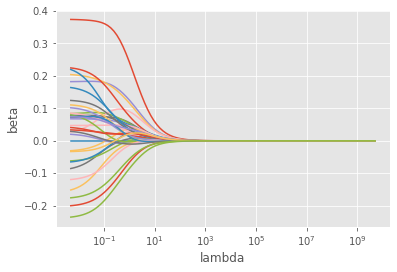

In [112]:
#Grafiquemos
ax = plt.gca()
ax.plot(lambdas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('beta')

En este gráfico vemos que entre más grande es lambda, más cerca a cero es beta

### Construir un modelo

In [106]:
#Le pasamos como parámetro el vectos con los diferentes valores de lambda para que se elija la mejor con "cross validation"
ridgecv = RidgeCV(alphas = lambdas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
print('El valor de lambda encontrado con "cross validation" es: ', round(ridgecv.alpha_,3))

El valor de lambda encontrado con "cross validation" es:  0.329


Verificamos que el valor encontrado está en el vector de Lambdas

In [107]:
ridgecv.alpha_ in lambdas

True

In [108]:
#Se imprimen los valores de los coeficientes
mod_ridgeCV = Ridge(alpha = ridgecv.alpha_, normalize = True)
mod_ridgeCV.fit(X_train, y_train)
print(pd.Series(mod_ridgeCV.coef_, index = X.columns)) #valor de los coeficientes

0     0.325474
1     0.000000
2     0.161933
3     0.070128
4     0.154811
5     0.072775
6     0.097323
7     0.124380
8     0.069268
9     0.059021
10   -0.004964
11    0.021279
12   -0.015850
13    0.048756
14    0.021107
15    0.003149
16   -0.006325
17    0.062935
18   -0.028758
19    0.002046
20    0.042421
21   -0.115959
22    0.068845
23    0.037668
24    0.059698
25    0.042584
26   -0.135944
27   -0.041937
28    0.021366
29    0.042238
30    0.045893
31   -0.005328
32    0.003749
33   -0.097243
dtype: float64


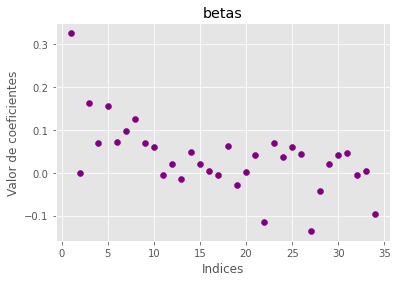

In [109]:
#Se grafican los valores de los coeficientes (betas).
eje_X = range(1, len(mod_ridgeCV.coef_)+1, 1)
plt.scatter(eje_X, mod_ridgeCV.coef_, color= 'purple')
plt.title("betas")
plt.xlabel("Indices")
plt.ylabel("Valor de coeficientes")
plt.show()

## Lasso